In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix
from subprocess import check_output
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt

# Import libraries

In [2]:
#read dataset
data = pd.read_csv('../input/mushrooms.csv')
   # chose path where .data file present

# Data Preprocessing: 

In [3]:
data.head()  #to find first 5 values

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


in class e for 'edible', and p for 'poisonous'.

In [4]:
data.columns 

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

MISSING ATTRIBUTE: In the dataset, there is an attribute with missing values. Its name is stalk-root. The missing value is represented by "?". 


In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
data['stalk-root'].value_counts(dropna=False)

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

now we can see that 'stalk-root' has 2480 missing value.
    

# How to handle this missing value?

# strategy 1):

In [8]:
#data["stalk-root"].replace(["?"], ["b"], inplace= True)   # use b(it is mode) 

# Strategy 2):

In [9]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [10]:
data['stalk-root'].value_counts(dropna=False)

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

In [11]:
data['stalk-root'].describe()

count    8124.000000
mean        1.109798
std         1.061106
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: stalk-root, dtype: float64

In [12]:
data["stalk-root"] = data["stalk-root"].astype(object)

In [13]:
#data["stalk-root"][::].replace(0, 1.109565) 
#1.109565 = mean 

In [14]:
data["stalk-root"] = data["stalk-root"].astype(int)

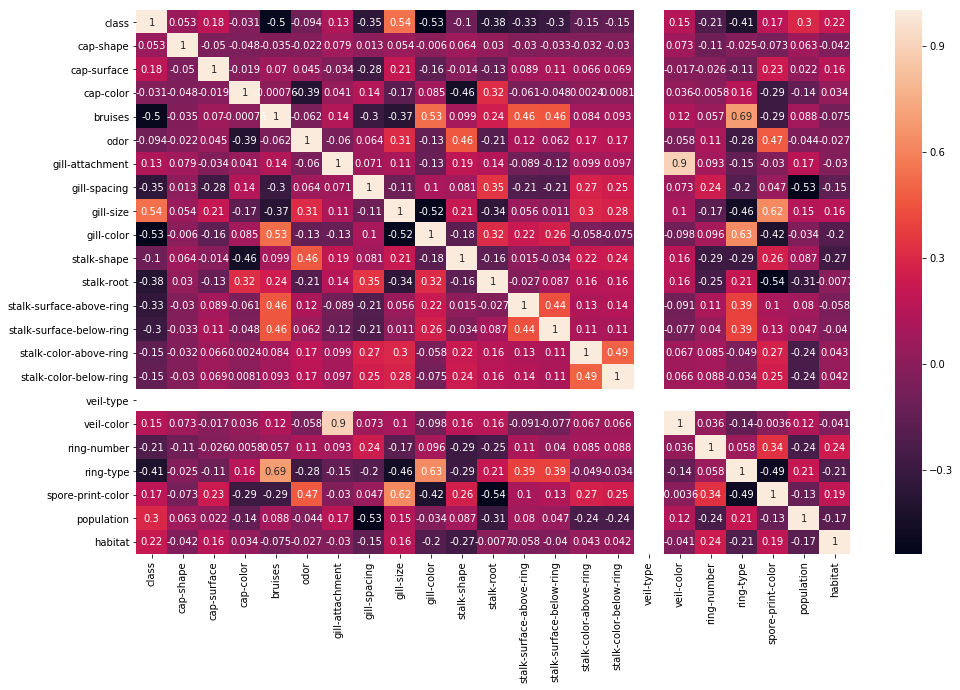

In [15]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True);

by observing heatmap, we can see that veil-type is not contributing to dataset.


In [16]:
data = data.drop('veil-type', axis=1)


# Strategy 3)

In [17]:
data=data.drop(["stalk-root"],axis=1)

In [18]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,2,1,0,3,0,1


 in class 0 for 'edible' and 1 for 'poisonous'.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8124 non-null int64
ring-type                   8124 non-null int64
spore-print-color           8

dataset does not included any object, now we are ready to build our model.

# Feature selection

In [20]:
X = data.drop(['class'], axis=1)  #remove target from train dataset
y = data['class'] # test dataset with target 

In [21]:
 # divide dataset into 50% train, and other 50% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Decision Tree classifier

we use **BINARY SPLITS**.

# i )The Gini impurity

In [22]:
clf1 = DecisionTreeClassifier(criterion = "gini",                # model design 
            random_state = 100,max_depth=2, min_samples_leaf=5, ) 
# split dataset into depth 2(0,1,2)
# stop dataset when leaf is 5 . 

In [23]:
clf1 = clf1.fit(X_train, y_train)  #training the model 

In [24]:
y_pred = clf1.predict(X_test)  # prediction on test dataset 

In [25]:
print('accuracy of train dataset is',clf1.score(X_train, y_train))

accuracy of train dataset is 0.913835548990645


In [26]:
print('accuracy of test dataset is',clf1.score(X_test, y_test))

accuracy of test dataset is 0.9079271294928607


In [27]:
from sklearn.metrics import classification_report
print("Decision tree Classification report", classification_report(y_test, y_pred))

Decision tree Classification report               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2085
           1       0.96      0.84      0.90      1977

   micro avg       0.91      0.91      0.91      4062
   macro avg       0.91      0.91      0.91      4062
weighted avg       0.91      0.91      0.91      4062



 precision score of class 0 is 0.87, and class 1 is 0.96

 Recall score of class 0 is 0.97, and class1 is 0.85

 f1- score of class 0  is 0.92 and class1 is 0.90. 

In [28]:
confusion_matrix(y_test, y_pred)

array([[2020,   65],
       [ 309, 1668]])

2048  are classify in class 0 , 1656  classify in class 1 and 358 items does not classify on any class. 

Text(0.5, 15.0, 'predicted label')

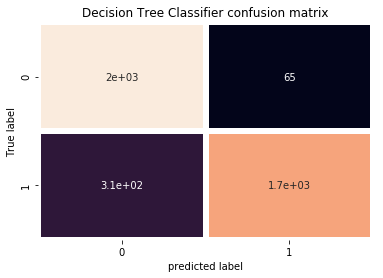

In [29]:
cfm=confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, linewidth=5, cbar=None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('predicted label')

In [30]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dot_data = export_graphviz(clf1, out_file='tree1.dot',
                          feature_names=X.columns,
                          filled=True, rounded = True, 
                          special_characters= True,
             class_names=['0','1']  )
graph = graphviz.Source(dot_data)



In [32]:
os.system('dot -Tpng tree1.dot -o tree1.png')

0

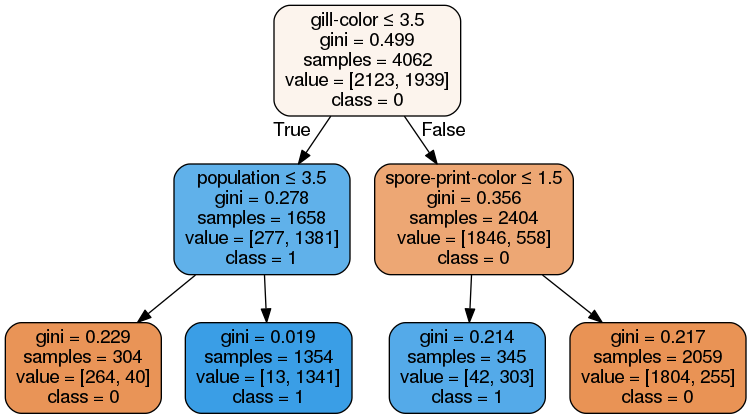

In [33]:
from IPython.display import Image
Image(filename="tree1.png", height=1000, width=1000)

# ii)The GINI Impurity:

In [34]:
clf2 = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=5, min_samples_leaf=15, ) 
clf2 = clf2.fit(X_train, y_train)   
# split dataset into depth 5
# stop dataset when leaf is 15. 

In [35]:
y_pred = clf2.predict(X_test)

In [36]:
print('accuracy of train dataset is',clf2.score(X_train, y_train))

accuracy of train dataset is 0.9736582964057114


In [37]:
print('accuracy of test dataset is',clf2.score(X_test, y_test))

accuracy of test dataset is 0.9761201378631216


In [38]:
from sklearn.metrics import classification_report
print("Decision tree Classification report", classification_report(y_test, y_pred))

Decision tree Classification report               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2085
           1       0.96      0.99      0.98      1977

   micro avg       0.98      0.98      0.98      4062
   macro avg       0.98      0.98      0.98      4062
weighted avg       0.98      0.98      0.98      4062



 precision score of class 0 is 0.98, and class 1 is 0.96

 recall score of class 0 is 0.96 and class 1 is 0.98

f1 score of class 0 and class 1 is 0.97

In [39]:
confusion_matrix(y_test, y_pred)

array([[2008,   77],
       [  20, 1957]])

2034  are classify in class 0 , 1913  classify in class 1 and 115 items does not classify on any class. 

Text(0.5, 15.0, 'predicted label')

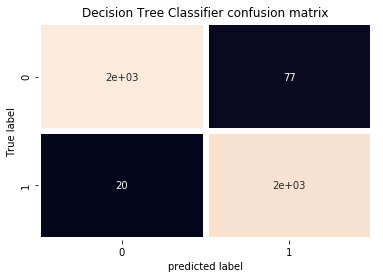

In [40]:
cfm=confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, linewidth=5, cbar=None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('predicted label')

In [41]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dot_data = export_graphviz(clf2, out_file='tree2.dot',
                          feature_names=X.columns,
                          filled=True, rounded = True, 
                          special_characters= True,
             class_names=['0','1']  )
graph = graphviz.Source(dot_data)



In [43]:
os.system('dot -Tpng tree2.dot -o tree2.png')

0

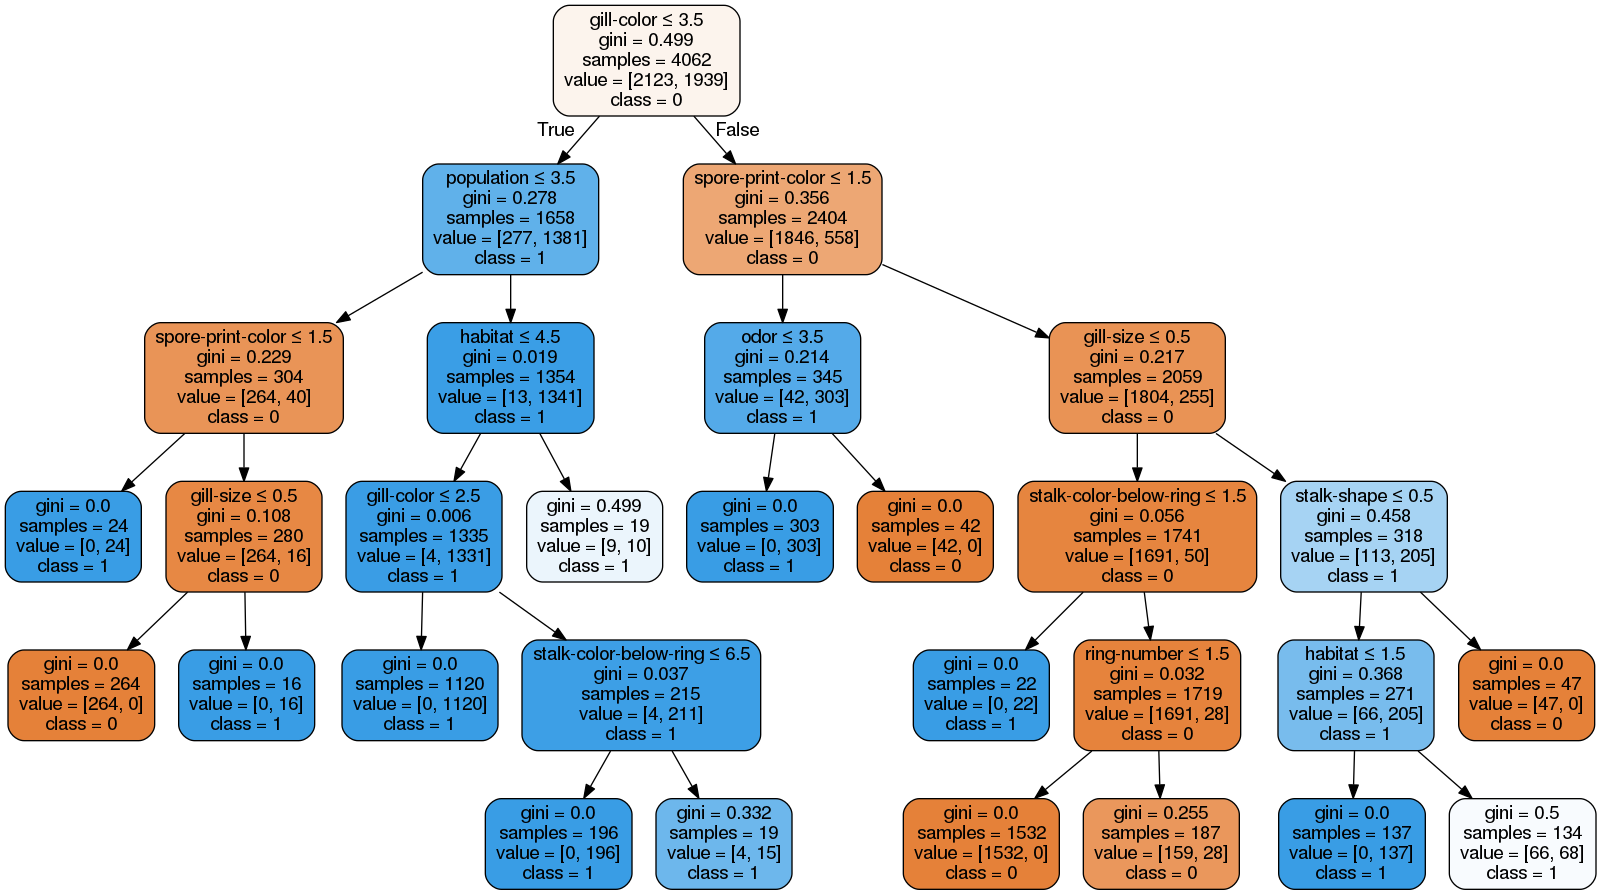

In [44]:
from IPython.display import Image
Image(filename="tree2.png", height=1000, width=1000)

# iii)The entropy impurity: 

In [45]:
clf3 = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 10) 
clf3 = clf3.fit(X_train, y_train)
# split dataset into depth 3(0,1,2,3)
# stop dataset when leaf is 10 . 

In [46]:
y_pred = clf3.predict(X_test)

In [47]:
print('accuracy of train dataset is',clf3.score(X_train, y_train))

accuracy of train dataset is 0.9554406696208764


In [48]:
print('accuracy of test dataset is',clf3.score(X_test, y_test))

accuracy of test dataset is 0.9588872476612507


In [49]:
print("Decision tree Classification report", classification_report(y_test, y_pred))

Decision tree Classification report               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2085
           1       0.94      0.98      0.96      1977

   micro avg       0.96      0.96      0.96      4062
   macro avg       0.96      0.96      0.96      4062
weighted avg       0.96      0.96      0.96      4062



 precision score of class 0 is 0.97, and class 1 is 0.94

 recall score of class 0 is 0.94, and class 1 is 0.97

F1-score score of class 0 is 0.96, and class 1 is 0.95

In [50]:
confusion_matrix(y_test, y_pred)

array([[1967,  118],
       [  49, 1928]])

1983  are classify in class 0 , 1896  classify in class 1 and 183 items does not classify on any class. 

Text(0.5, 15.0, 'predicted label')

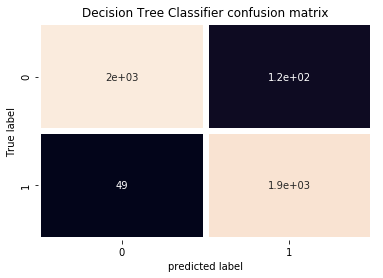

In [51]:
cfm=confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, linewidth=5, cbar=None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('predicted label')

In [52]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dot_data = export_graphviz(clf3, out_file='tree3.dot',
                          feature_names=X.columns,
                          filled=True, rounded = True, 
                          special_characters= True,
             class_names=['0','1']  )
graph = graphviz.Source(dot_data)



In [54]:
os.system('dot -Tpng tree3.dot -o tree3.png')

0

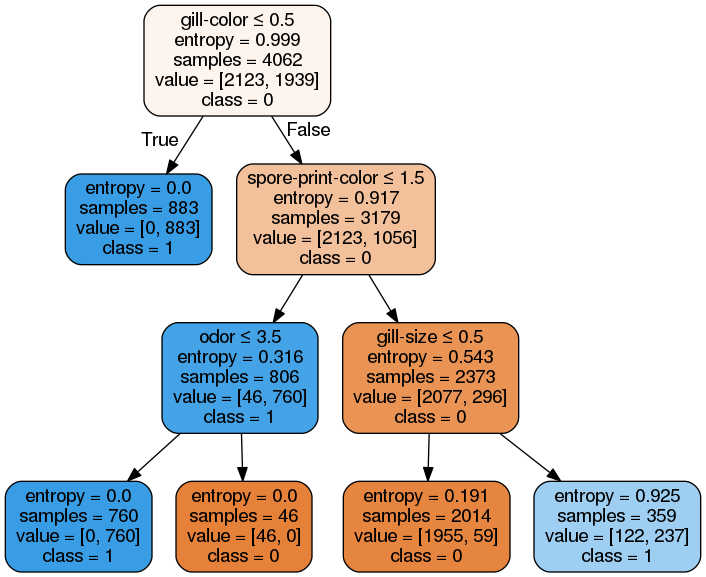

In [55]:
from IPython.display import Image
Image(filename="tree3.png", height=1000, width=1000)

# iv)The entropy impurity

In [56]:
clf4 = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 10, min_samples_leaf = 20) 
clf4 = clf4.fit(X_train, y_train)
# split dataset into depth 3(0,1,2,3)
# stop dataset when leaf is 10 . 

In [57]:
y_pred = clf4.predict(X_test)

In [58]:
print('accuracy of train dataset is',clf4.score(X_train, y_train))

accuracy of train dataset is 1.0


In [59]:
print('accuracy of test dataset is',clf4.score(X_test, y_test))

accuracy of test dataset is 1.0


In [60]:
print("Decision tree Classification report", classification_report(y_test, y_pred))

Decision tree Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

   micro avg       1.00      1.00      1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



Precision, recall and f1 score is 1.00 which is 100%

In [61]:
confusion_matrix(y_test, y_pred)

array([[2085,    0],
       [   0, 1977]])

2111  are classify in class 0 , 1949  classify in class 1 and only 2  items does not classify on any class. 

Text(0.5, 15.0, 'predicted label')

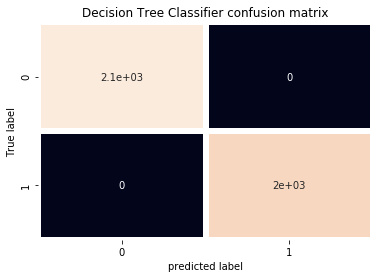

In [62]:
cfm=confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, linewidth=5, cbar=None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('predicted label')

In [63]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [64]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dot_data = export_graphviz(clf4, out_file='tree4.dot',
                          feature_names=X.columns,
                          filled=True, rounded = True, 
                          special_characters= True,
             class_names=['0','1']  )
graph = graphviz.Source(dot_data)



In [65]:
os.system('dot -Tpng tree4.dot -o tree4.png')

0

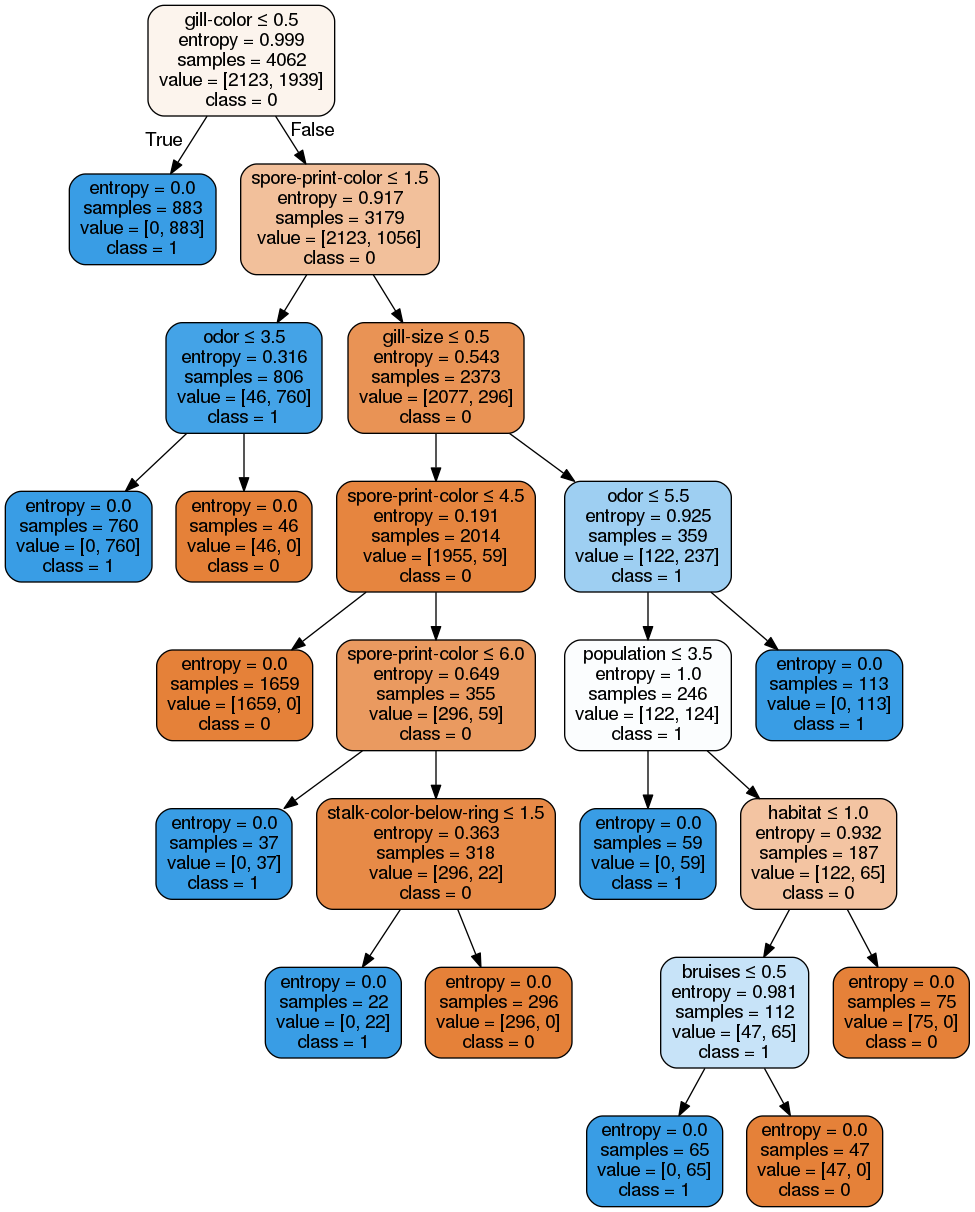

In [66]:
from IPython.display import Image
Image(filename="tree4.png", height=1000, width=1000)

 Decision Tree classifier accuracy is 100%, this is the problem of overfitting-->
    
 this problem salved by K-Fold.    